# Project Title -
Predicting Customer Churn in Telecommunication Services Using Machine Learning

# Problem Statement -
In the highly competitive telecommunications industry, retaining customers is crucial for business sustainability. The goal of this project is to develop a predictive model that can identify customers at risk of churning. Churn prediction allows companies to proactively engage with customers, offering targeted incentives or interventions to retain their business.

# Objective -
The primary goal of this project is to develop a robust and accurate machine learning model that predicts customer churn for a telecommunications company. By analyzing historical customer data, the model aims to identify patterns and factors that contribute to customer churn. The ultimate objective is to empower the company with actionable insights, allowing for targeted retention strategies and proactive customer management.

# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# Load Dataset

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Data Understanding

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.size

147903

In [10]:
data.shape

(7043, 21)

In [11]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
data = data.drop('customerID',axis=1)

In [13]:
print(data['gender'].unique())
print()
print(data['SeniorCitizen'].unique())
print()
print(data['Partner'].unique())
print()
print(data['Dependents'].unique())
print()
print(data['PhoneService'].unique())
print()
print(data['MultipleLines'].unique())
print()
print(data['InternetService'].unique())
print()
print(data['OnlineBackup'].unique())
print()
print(data['DeviceProtection'].unique())
print()
print(data['TechSupport'].unique())
print()
print(data['PaymentMethod'].unique())
print()
print(data['StreamingMovies'].unique())
print()
print(data['Contract'].unique())
print()
print(data['PaperlessBilling'].unique())
print()
print(data['StreamingTV'].unique())
print()
print(data['Churn'].unique())
print()
print(data['OnlineSecurity'].unique())

['Female' 'Male']

[0 1]

['Yes' 'No']

['No' 'Yes']

['No' 'Yes']

['No phone service' 'No' 'Yes']

['DSL' 'Fiber optic' 'No']

['Yes' 'No' 'No internet service']

['No' 'Yes' 'No internet service']

['No' 'Yes' 'No internet service']

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

['No' 'Yes' 'No internet service']

['Month-to-month' 'One year' 'Two year']

['Yes' 'No']

['No' 'Yes' 'No internet service']

['No' 'Yes']

['No' 'Yes' 'No internet service']


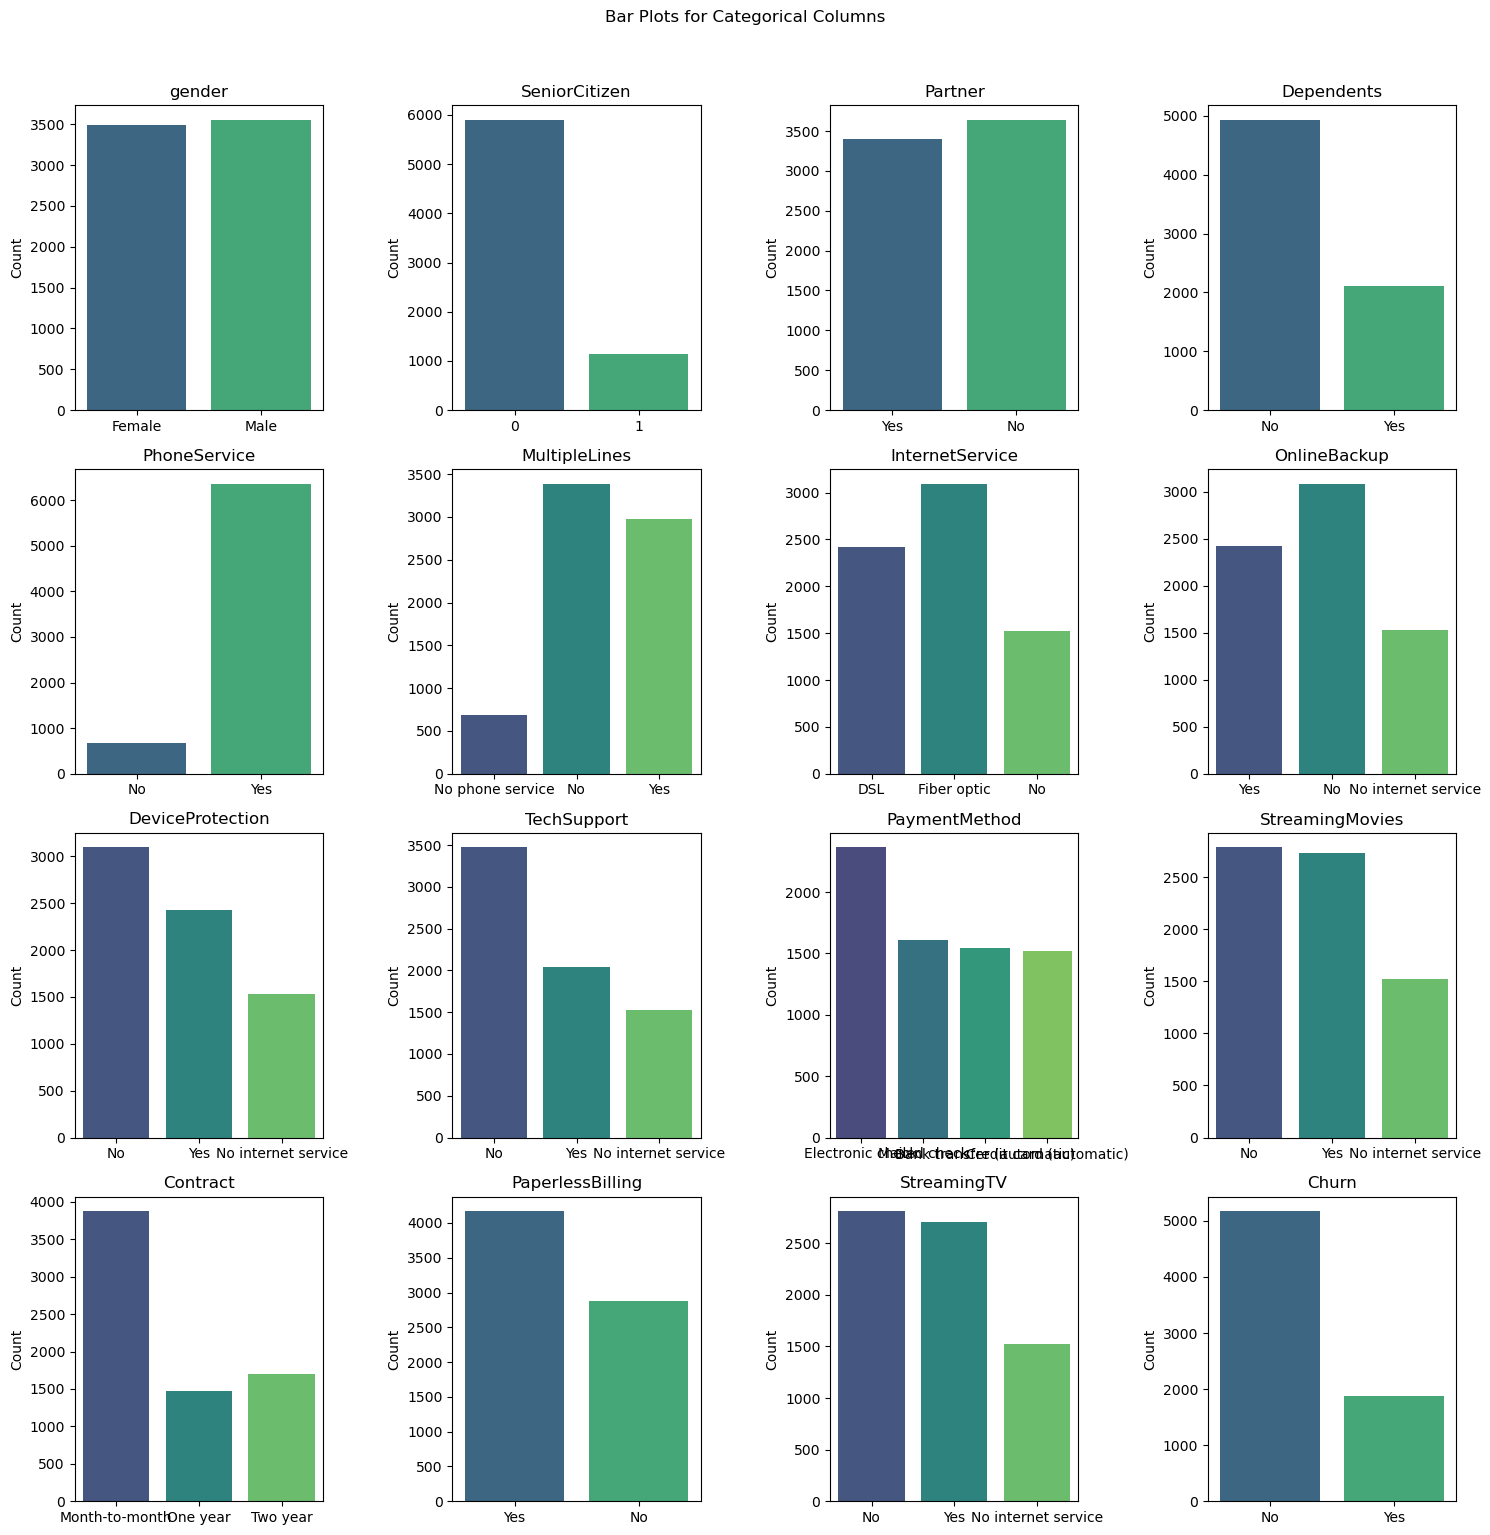

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'PaymentMethod', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'StreamingTV', 'Churn', 'OnlineSecurity'
]

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.suptitle('Bar Plots for Categorical Columns', y=1.02)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot bar plots for each categorical column
for col, ax in zip(categorical_columns, axes):
    sns.countplot(x=col, data=data, ax=ax, palette='viridis')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# Data Preprocessing

In [15]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
data = data.dropna()

In [17]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
import pandas as pd

# Assuming 'data' is your DataFrame


def custom_encode(column):
    unique_values = column.unique()
    if len(unique_values) == 2:
        encoding_dict = {
            value: index
            for index, value in enumerate(unique_values)
        }
    else:
        encoding_dict = {
            value: index
            for index, value in enumerate(sorted(unique_values))
        }
    return column.map(encoding_dict)


# List of categorical columns to encode
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'PaymentMethod', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'StreamingTV', 'Churn', 'OnlineSecurity'
]

# Apply custom encoding to each categorical column
for col in categorical_columns:
    data[col] = custom_encode(data[col])

In [19]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,2,29.85,29.85,0
1,1,0,1,0,34,1,0,0,2,0,2,0,0,0,1,1,3,56.95,1889.5,0
2,1,0,1,0,2,1,0,0,2,2,0,0,0,0,0,0,3,53.85,108.15,1
3,1,0,1,0,45,0,1,0,2,0,2,2,0,0,1,1,0,42.30,1840.75,0
4,0,0,1,0,2,1,0,1,0,0,0,0,0,0,0,0,2,70.70,151.65,1


In [20]:
# Convert 'TotalCharges' to numeric, handling errors with 'coerce'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [21]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [22]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,2,29.85,29.85,0
1,1,0,1,0,34,1,0,0,2,0,2,0,0,0,1,1,3,56.95,1889.50,0
2,1,0,1,0,2,1,0,0,2,2,0,0,0,0,0,0,3,53.85,108.15,1
3,1,0,1,0,45,0,1,0,2,0,2,2,0,0,1,1,0,42.30,1840.75,0
4,0,0,1,0,2,1,0,1,0,0,0,0,0,0,0,0,2,70.70,151.65,1
5,0,0,1,0,8,1,2,1,0,0,2,0,2,2,0,0,2,99.65,820.50,1
6,1,0,1,1,22,1,2,1,0,2,0,0,2,0,0,0,1,89.10,1949.40,0
7,0,0,1,0,10,0,1,0,2,0,0,0,0,0,0,1,3,29.75,301.90,0
8,0,0,0,0,28,1,2,1,0,0,2,2,2,2,0,0,2,104.80,3046.05,1
9,1,0,1,1,62,1,0,0,2,2,0,0,0,0,1,1,0,56.15,3487.95,0


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [24]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0.013889,0,1,0,0,2,0,0,0,0,0,0,2,0.115423,0.001275,0
1,1,0,1,0,0.472222,1,0,0,2,0,2,0,0,0,1,1,3,0.385075,0.215867,0
2,1,0,1,0,0.027778,1,0,0,2,2,0,0,0,0,0,0,3,0.354229,0.010310,1
3,1,0,1,0,0.625000,0,1,0,2,0,2,2,0,0,1,1,0,0.239303,0.210241,0
4,0,0,1,0,0.027778,1,0,1,0,0,0,0,0,0,0,0,2,0.521891,0.015330,1
5,0,0,1,0,0.111111,1,2,1,0,0,2,0,2,2,0,0,2,0.809950,0.092511,1
6,1,0,1,1,0.305556,1,2,1,0,2,0,0,2,0,0,0,1,0.704975,0.222779,0
7,0,0,1,0,0.138889,0,1,0,2,0,0,0,0,0,0,1,3,0.114428,0.032668,0
8,0,0,0,0,0.388889,1,2,1,0,0,2,2,2,2,0,0,2,0.861194,0.349325,1
9,1,0,1,1,0.861111,1,0,0,2,2,0,0,0,0,1,1,0,0.377114,0.400317,0


In [25]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [26]:
# Drop rows with NaN values in the 'TotalCharges' column
data = data.dropna(subset=['TotalCharges'])

In [27]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Exploration

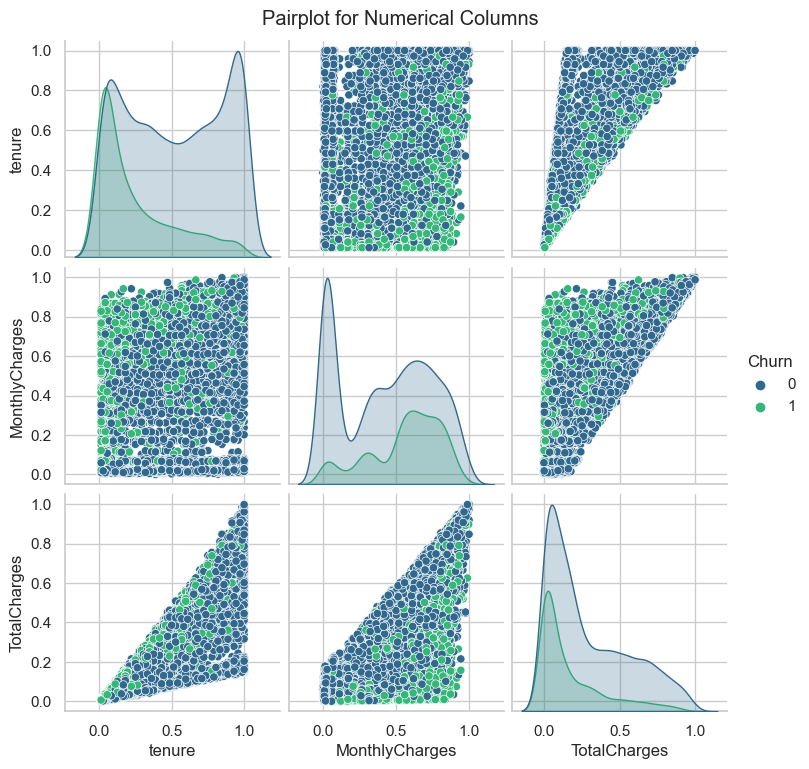

In [28]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Pairplot for numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(data, hue='Churn', vars=numerical_columns, palette='viridis')
plt.suptitle('Pairplot for Numerical Columns', y=1.02)
plt.show()

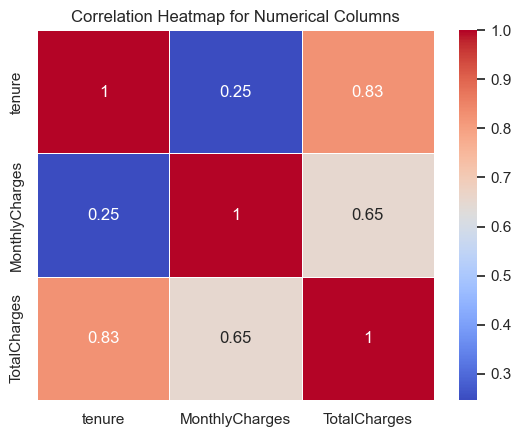

In [29]:
# Correlation heatmap for numerical columns
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

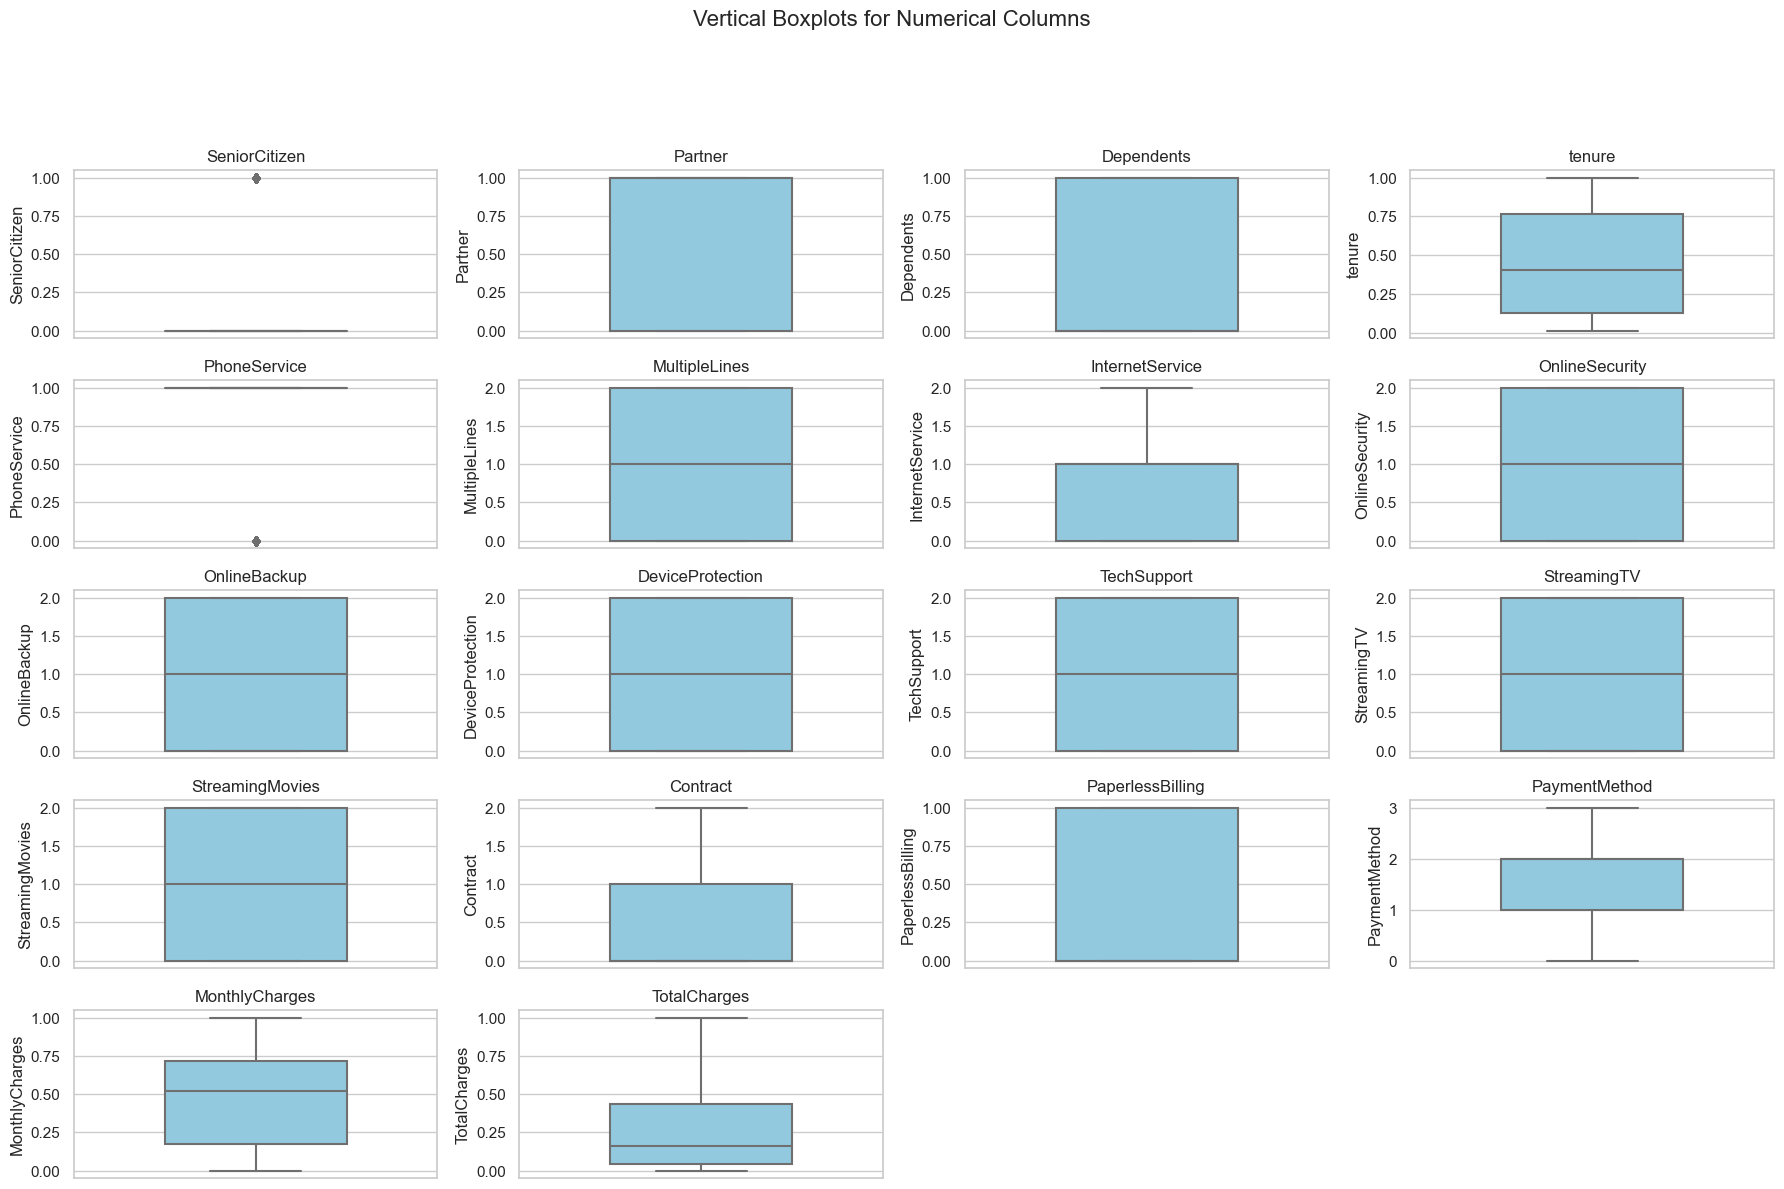

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(18, 12))
plt.suptitle('Vertical Boxplots for Numerical Columns', y=1.02, fontsize=16)

# Exclude 'gender' and 'Churn' columns from boxplots
numerical_columns = [
    'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
    'TotalCharges'
]

# Create vertical boxplots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=data[col],
                orient='v',
                width=0.5,
                color='skyblue',
                linewidth=1.5)
    plt.title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

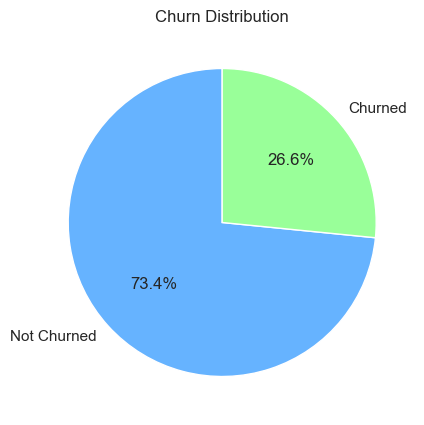

In [31]:
# Plot 1: Pie chart for the distribution of Churn
churn_counts = data['Churn'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['#66b3ff', '#99ff99']

plt.figure(figsize=(10, 5))
plt.pie(churn_counts,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Churn Distribution')
plt.show()

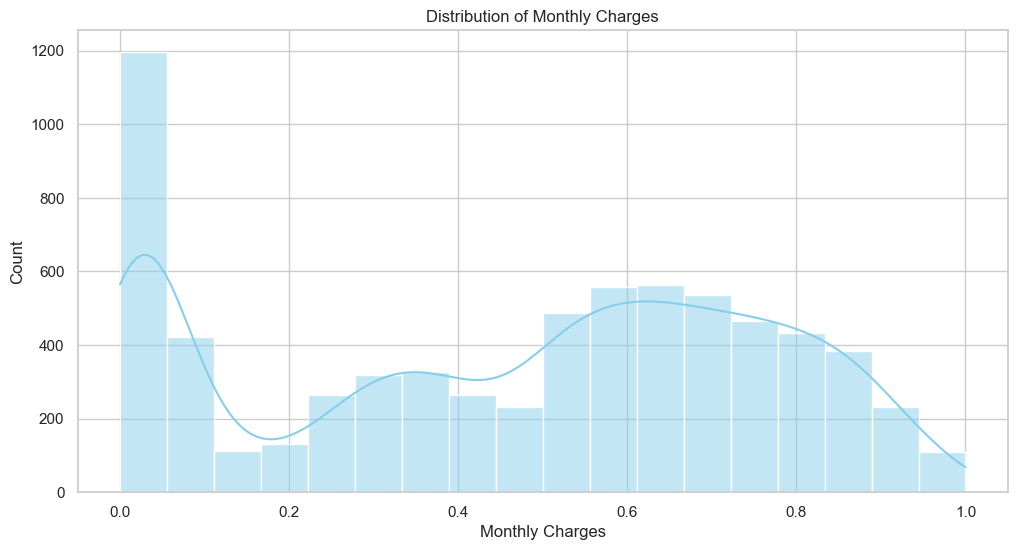

In [32]:
# Plot 5: Monthly Charges distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['MonthlyCharges'], kde=True, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

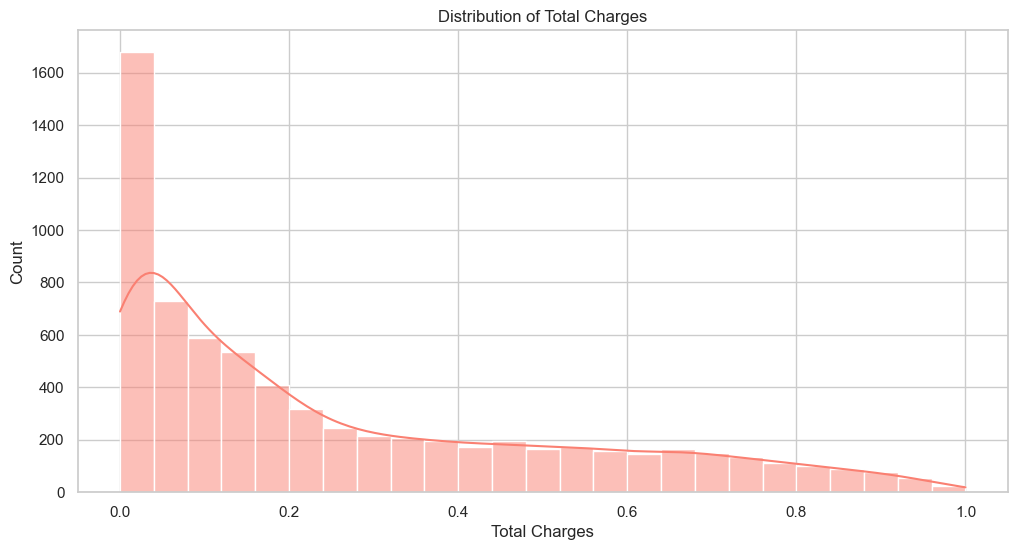

In [33]:
# Plot 6: Total Charges distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['TotalCharges'], kde=True, color='salmon')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

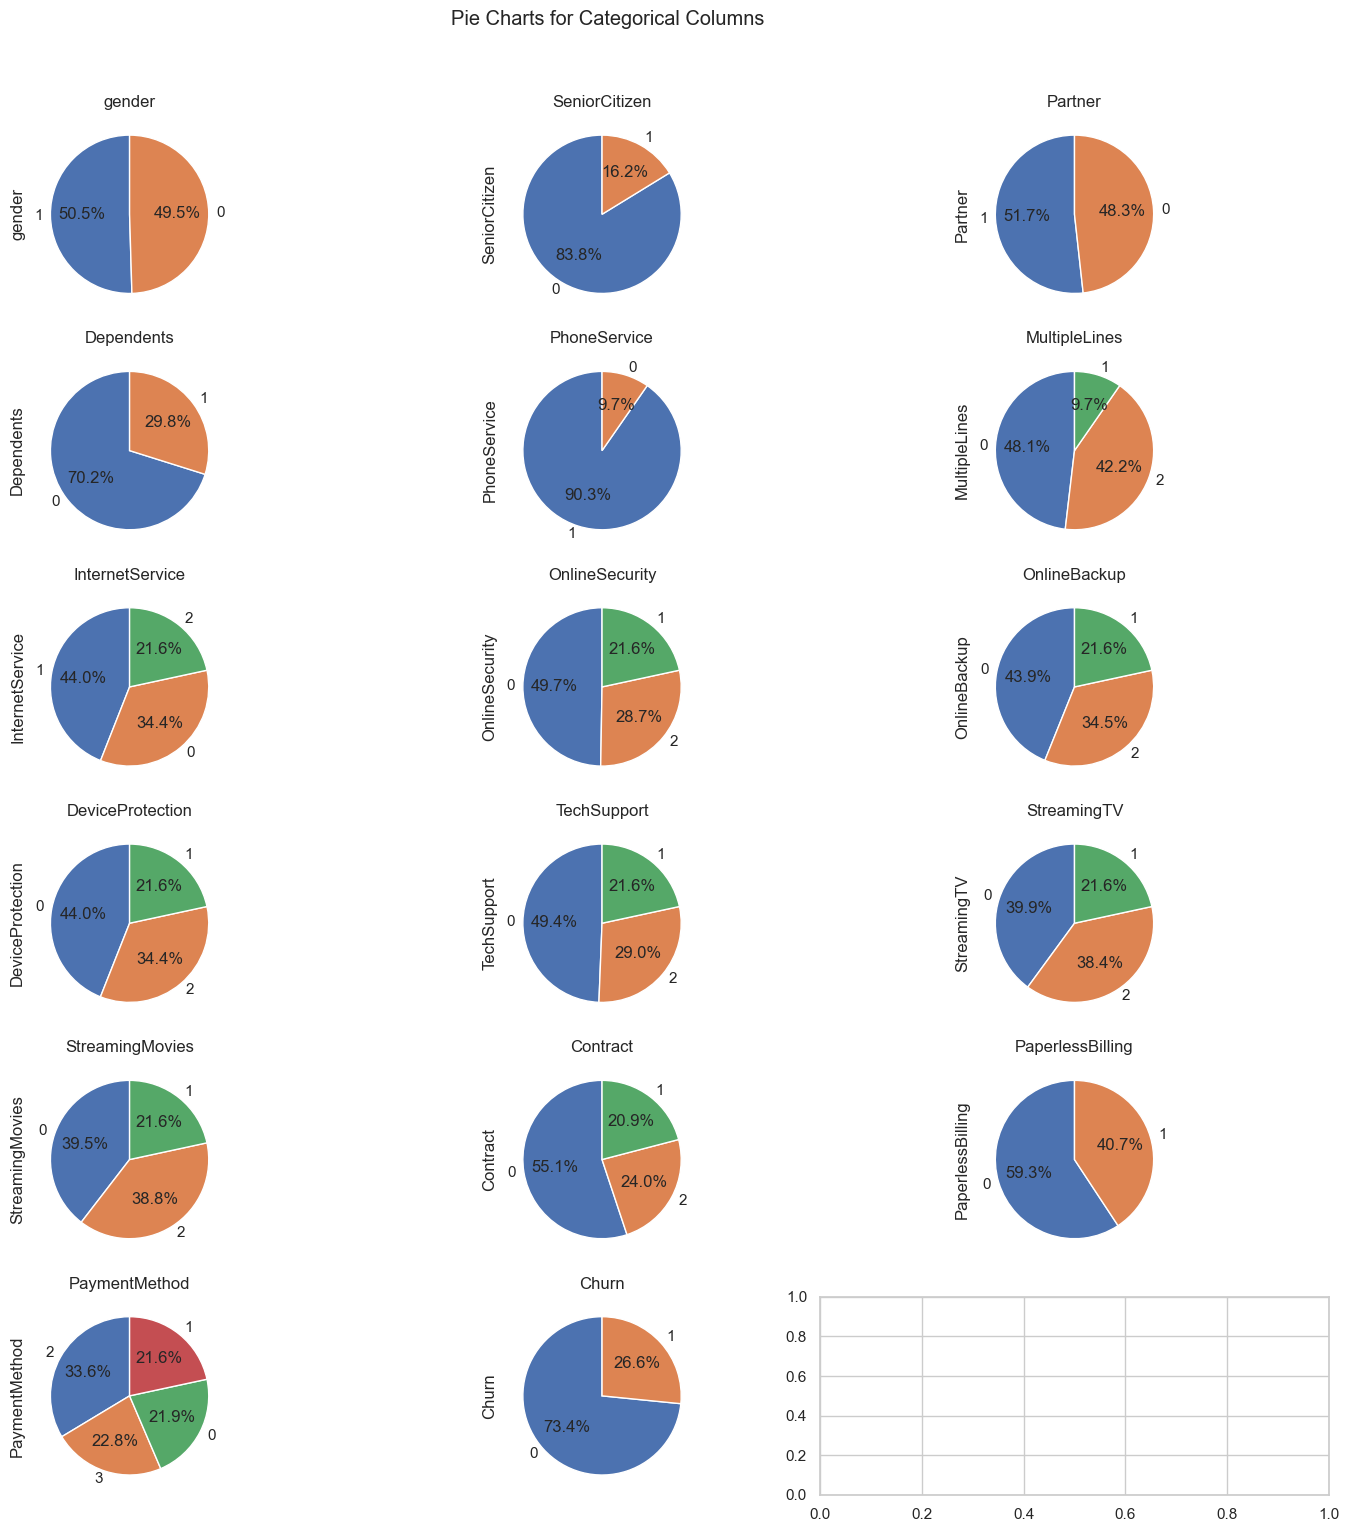

In [34]:
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Set up subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
fig.suptitle('Pie Charts for Categorical Columns', y=1.02)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot pie charts for each categorical column
for col, ax in zip(categorical_columns, axes):
    data[col].value_counts().plot(kind='pie',
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  ax=ax)
    ax.set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

# Data Splitting

In [35]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0.013889,0,1,0,0,2,0,0,0,0,0,0,2,0.115423,0.001275,0
1,1,0,1,0,0.472222,1,0,0,2,0,2,0,0,0,1,1,3,0.385075,0.215867,0
2,1,0,1,0,0.027778,1,0,0,2,2,0,0,0,0,0,0,3,0.354229,0.010310,1
3,1,0,1,0,0.625000,0,1,0,2,0,2,2,0,0,1,1,0,0.239303,0.210241,0
4,0,0,1,0,0.027778,1,0,1,0,0,0,0,0,0,0,0,2,0.521891,0.015330,1
5,0,0,1,0,0.111111,1,2,1,0,0,2,0,2,2,0,0,2,0.809950,0.092511,1
6,1,0,1,1,0.305556,1,2,1,0,2,0,0,2,0,0,0,1,0.704975,0.222779,0
7,0,0,1,0,0.138889,0,1,0,2,0,0,0,0,0,0,1,3,0.114428,0.032668,0
8,0,0,0,0,0.388889,1,2,1,0,0,2,2,2,2,0,0,2,0.861194,0.349325,1
9,1,0,1,1,0.861111,1,0,0,2,2,0,0,0,0,1,1,0,0.377114,0.400317,0


In [36]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [37]:
X = X.dropna()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0.013889,0,1,0,0,2,0,0,0,0,0,0,2,0.115423,0.001275
1,1,0,1,0,0.472222,1,0,0,2,0,2,0,0,0,1,1,3,0.385075,0.215867
2,1,0,1,0,0.027778,1,0,0,2,2,0,0,0,0,0,0,3,0.354229,0.010310
3,1,0,1,0,0.625000,0,1,0,2,0,2,2,0,0,1,1,0,0.239303,0.210241
4,0,0,1,0,0.027778,1,0,1,0,0,0,0,0,0,0,0,2,0.521891,0.015330


In [38]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6030,0,0,1,0,0.597222,0,1,0,0,0,2,0,2,2,0,0,0,0.306468,0.237411
3410,1,0,1,0,0.041667,1,0,0,0,0,0,0,2,0,0,1,1,0.349751,0.019605
5483,0,0,0,0,0.763889,1,2,1,0,0,2,0,0,0,0,0,2,0.592040,0.512272
5524,1,0,0,1,0.625000,1,0,0,2,0,0,2,0,0,2,1,0,0.362189,0.292511
6337,0,0,0,1,0.763889,1,2,1,2,0,0,0,2,2,1,1,3,0.822388,0.626564


In [41]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2481,1,1,0,0,0.847222,1,2,2,1,1,1,1,1,1,2,1,0,0.067164,0.171123
6784,0,0,1,0,0.263889,1,2,2,1,1,1,1,1,1,0,1,0,0.064179,0.051587
6125,1,0,0,0,0.180556,1,2,1,0,0,2,0,2,2,0,0,1,0.835821,0.154650
3052,1,0,0,0,0.513889,1,2,0,2,0,0,0,0,0,0,0,3,0.366169,0.232166
4099,0,0,1,0,0.083333,0,1,0,2,0,0,0,0,0,0,1,0,0.111443,0.016461


In [42]:
y_train.head()

6030    1
3410    1
5483    1
5524    0
6337    0
Name: Churn, dtype: int64

In [43]:
y_test.head()

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

# Model Selection

In [44]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)
    print("\n")

Model: Logistic Regression
Accuracy: 0.7861
Precision: 0.6229
Recall: 0.4947
F1 Score: 0.5514
Confusion Matrix:
[[921 112]
 [189 185]]


Model: Decision Tree
Accuracy: 0.7228
Precision: 0.4801
Recall: 0.5160
F1 Score: 0.4974
Confusion Matrix:
[[824 209]
 [181 193]]


Model: Random Forest
Accuracy: 0.7846
Precision: 0.6272
Recall: 0.4679
F1 Score: 0.5360
Confusion Matrix:
[[929 104]
 [199 175]]


Model: SVM
Accuracy: 0.7832
Precision: 0.6245
Recall: 0.4626
F1 Score: 0.5315
Confusion Matrix:
[[929 104]
 [201 173]]


Model: k-NN
Accuracy: 0.7477
Precision: 0.5260
Recall: 0.5134
F1 Score: 0.5196
Confusion Matrix:
[[860 173]
 [182 192]]


Model: Gradient Boosting
Accuracy: 0.7953
Precision: 0.6514
Recall: 0.4947
F1 Score: 0.5623
Confusion Matrix:
[[934  99]
 [189 185]]




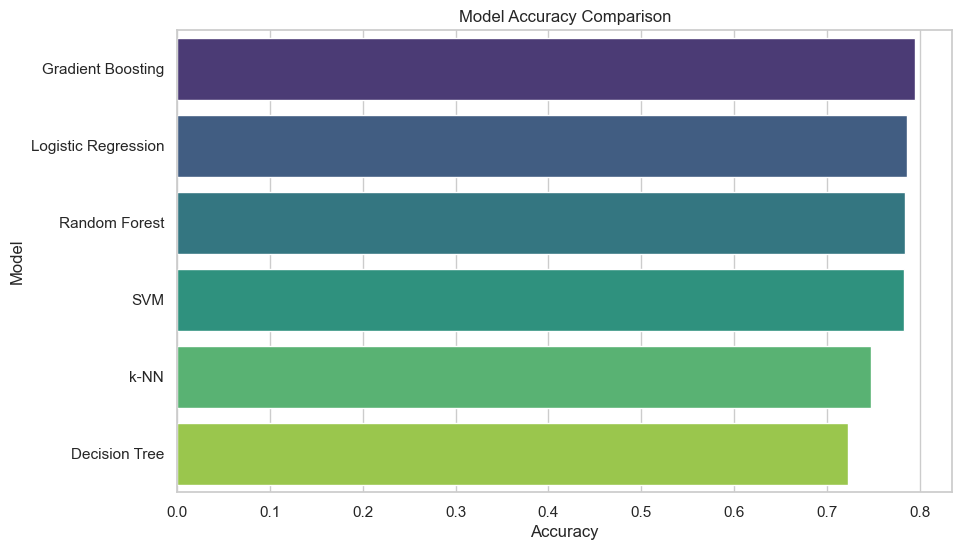

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Model names and corresponding accuracies
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN', 'Gradient Boosting']
accuracies = [0.7861, 0.7228, 0.7846, 0.7832, 0.7477, 0.7953]

# Create a DataFrame for easier plotting
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

# Hyperparameter Tunning

In [46]:
from sklearn.model_selection import GridSearchCV

# Assuming 'X_train', 'y_train' are your training data
# Assuming 'model' is your Gradient Boosting model

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Model Accuracy: 0.7953091684434968


# Feature Importance:

In [47]:
# Assuming 'best_model' is your trained model
feature_importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
14          Contract    0.404048
4             tenure    0.152562
17    MonthlyCharges    0.131782
8     OnlineSecurity    0.082943
18      TotalCharges    0.076999
11       TechSupport    0.060621
7    InternetService    0.023629
16     PaymentMethod    0.015706
15  PaperlessBilling    0.012470
1      SeniorCitizen    0.010665
6      MultipleLines    0.008278
9       OnlineBackup    0.005114
13   StreamingMovies    0.004637
3         Dependents    0.002675
0             gender    0.002433
5       PhoneService    0.002350
12       StreamingTV    0.002208
2            Partner    0.000677
10  DeviceProtection    0.000204


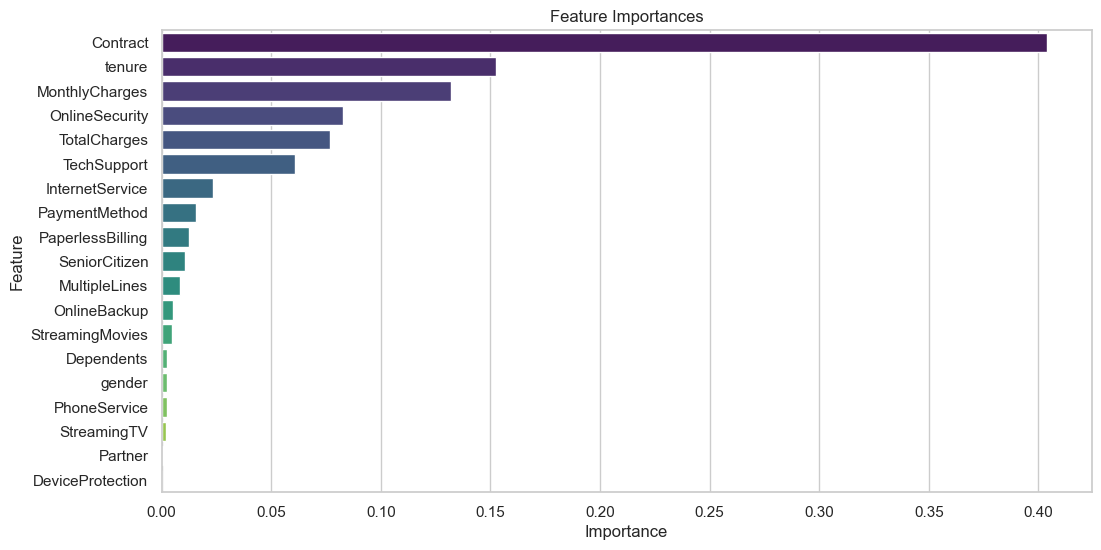

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'feature_importance_df' contains the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Learning Curve:

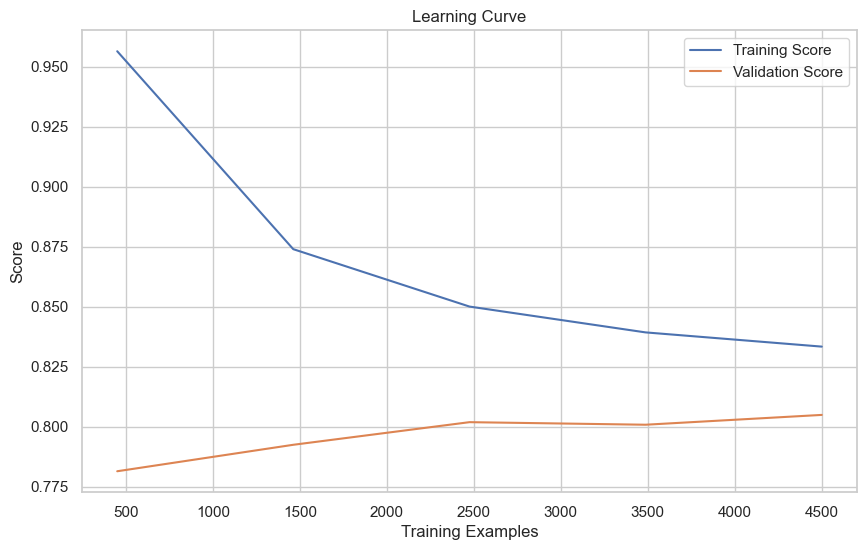

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
# Plot learning curve
# (Note: You may need to customize this plot based on your preferences)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Precision: 0.6514084507042254
Recall: 0.4946524064171123
F1 Score: 0.5623100303951367
Confusion Matrix:
[[934  99]
 [189 185]]


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X_train', 'y_train' are your training data
# Assuming 'X_test', 'y_test' are your test data

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model with manual early stopping
best_iteration = 0
best_score = 0
no_improvement_count = 0
max_no_improvement = 10  # Adjust as needed

for iteration in range(1, 101):  # Assuming 100 iterations initially
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)

    if accuracy > best_score:
        best_score = accuracy
        best_iteration = iteration
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= max_no_improvement:
        print(f"Early stopping at iteration {iteration}. Best iteration: {best_iteration}")
        break

# Train the model on the full training set with the best iteration
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Early stopping at iteration 11. Best iteration: 1
Accuracy: 0.7867803837953091


# Model Saving

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Assuming 'X_train', 'y_train' are your training data

# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Save the model to a file
model_filename = 'gradient_boosting_model.joblib'
joblib.dump(model, model_filename)

print("Model saved successfully.")

Model saved successfully.


# -------------------------------------Thank You!-----------------------------------------------------